# TOYOTA COROLLA PRICE PREDICTION

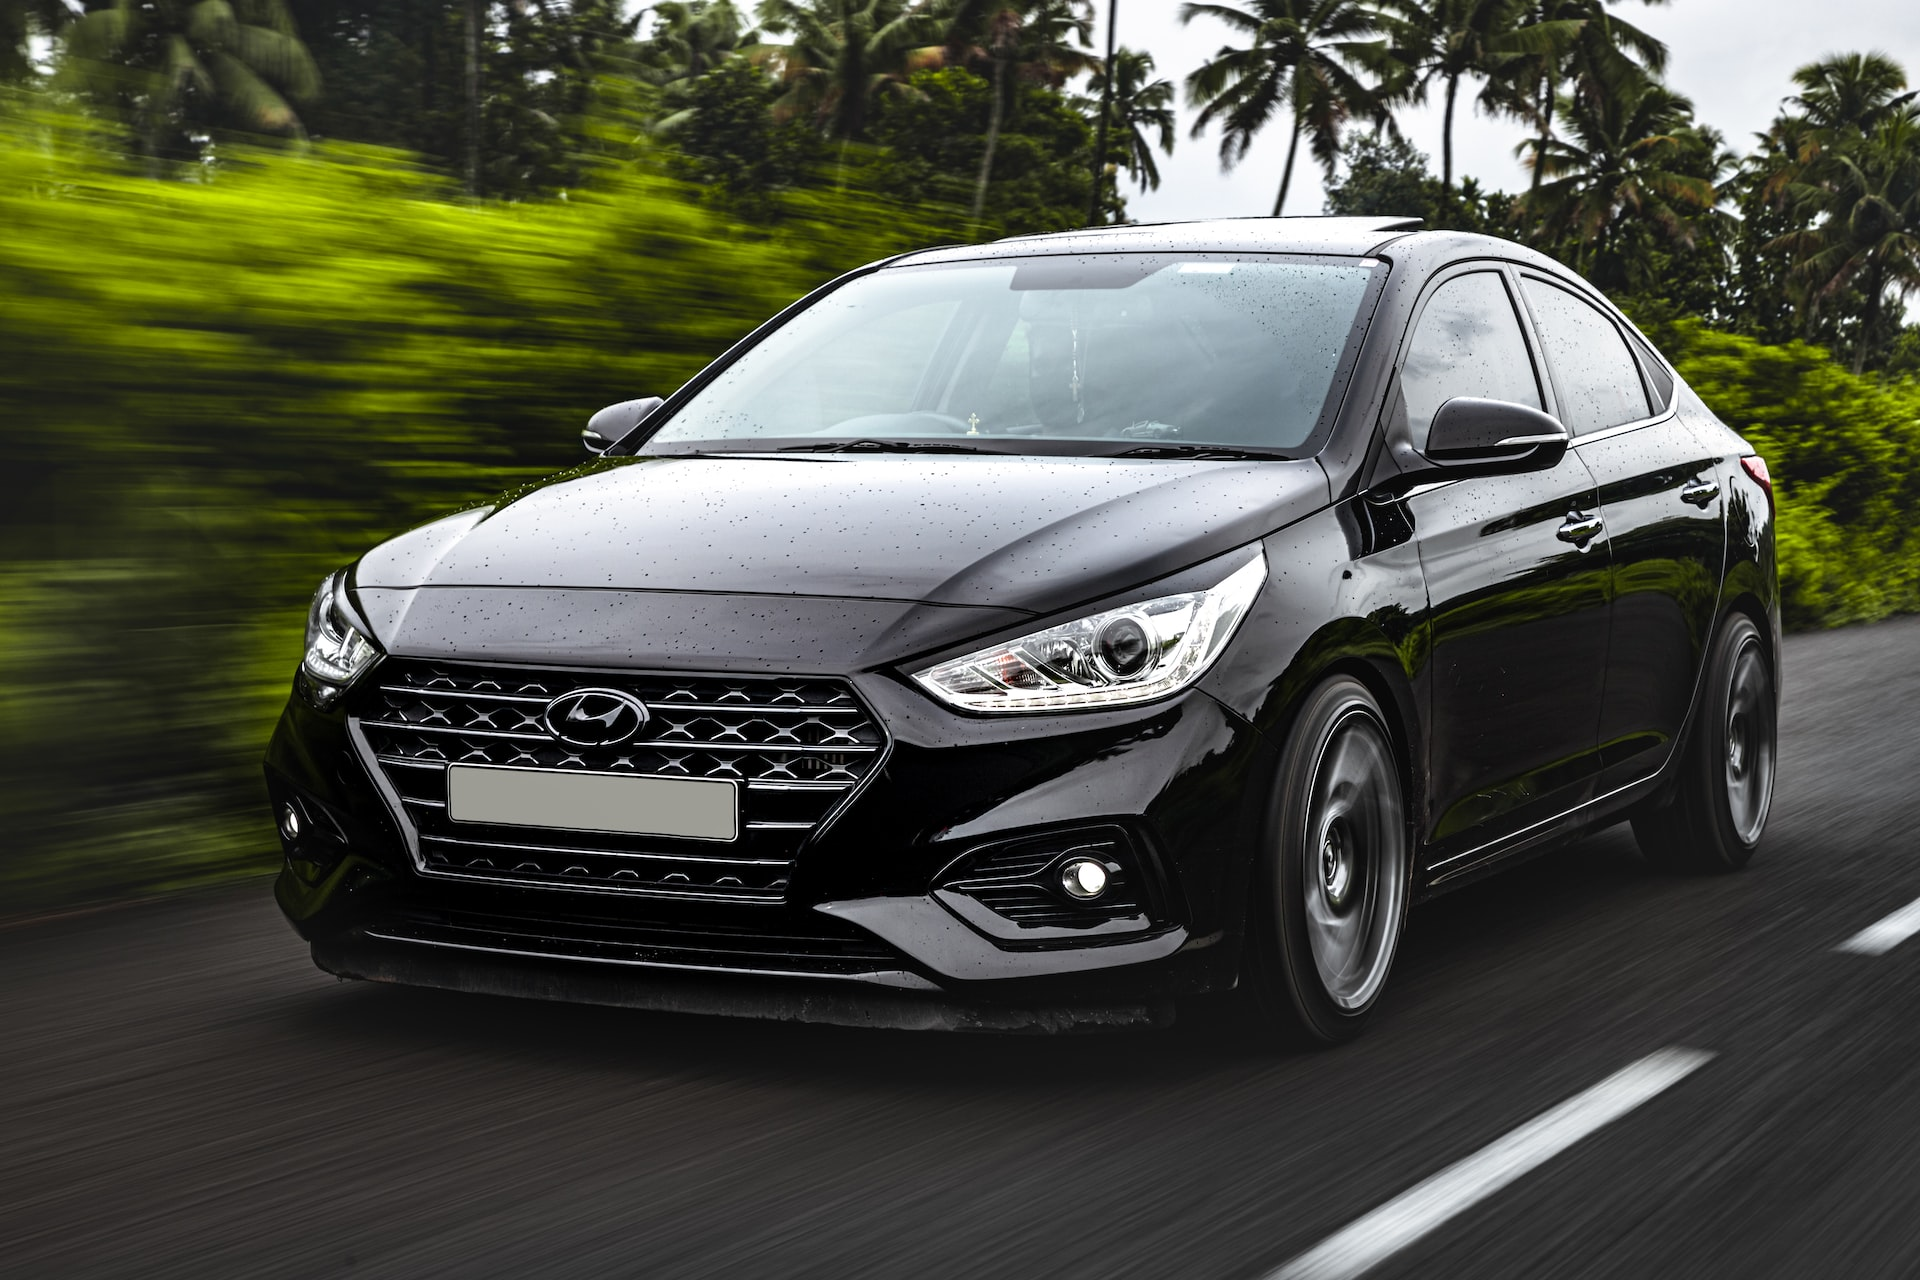

## INTRODUCTION:

* The Toyota Corolla is a series of compact cars (formerly subcompact) manufactured and marketed globally by the Toyota Motor Corporation. 
* Introduced in 1966, the Corolla was the best-selling car worldwide by 1974 and has been one of the best-selling cars in the world since then. 
* In 1997, the Corolla became the best-selling nameplate in the world, surpassing the Volkswagen Beetle.
* Toyota reached the milestone of 50 million Corollas sold over twelve generations in 2021.
* The purpose of this notebook is to Analyse the sales of the Car based on multiple factors of the Car and Predict the Car Price using Machine Learning.

### IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from collections import Counter

-----------------------------------------------------------------------

### OVERVIEW OF THE DATASET

In [ ]:
cars = pd.read_csv('ToyotaCorolla.csv')
cars.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [ ]:
cars.count()

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64

In [ ]:
cars.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [ ]:
cars.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

-----------------------------------------------------------------------

### EXPLORATORY DATA ANALYSIS

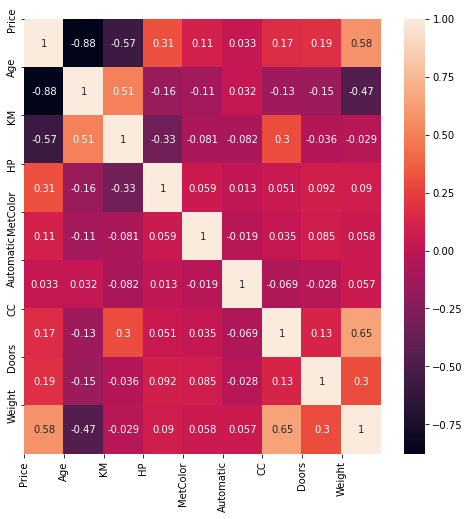

In [ ]:
corr = cars.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

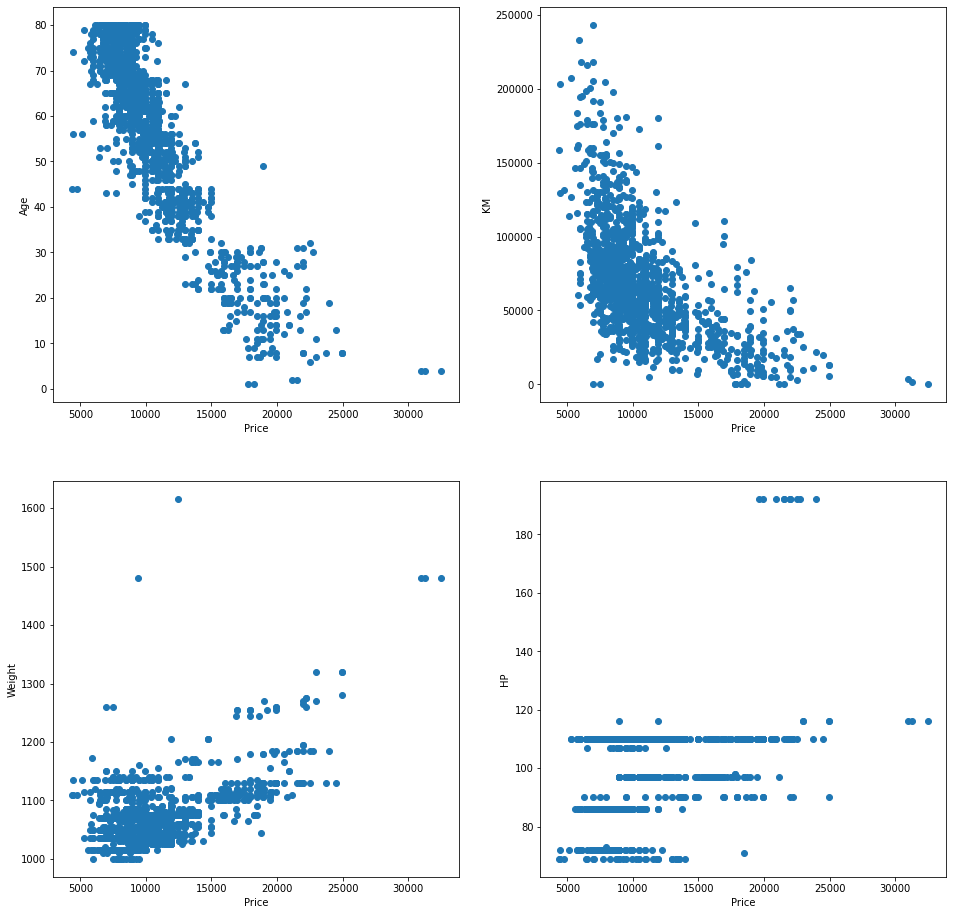

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(16,16))

axs[0,0].scatter(x = 'Price', y = 'Age', data = cars)
axs[0,0].set_xlabel('Price')
axs[0,0].set_ylabel('Age')

axs[0,1].scatter(x = 'Price', y = 'KM', data = cars)
axs[0,1].set_xlabel('Price')
axs[0,1].set_ylabel('KM')

axs[1,0].scatter(x = 'Price', y = 'Weight', data = cars)
axs[1,0].set_xlabel('Price')
axs[1,0].set_ylabel('Weight')

axs[1,1].scatter(x = 'Price', y = 'HP', data = cars)
axs[1,1].set_xlabel('Price')
axs[1,1].set_ylabel('HP')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


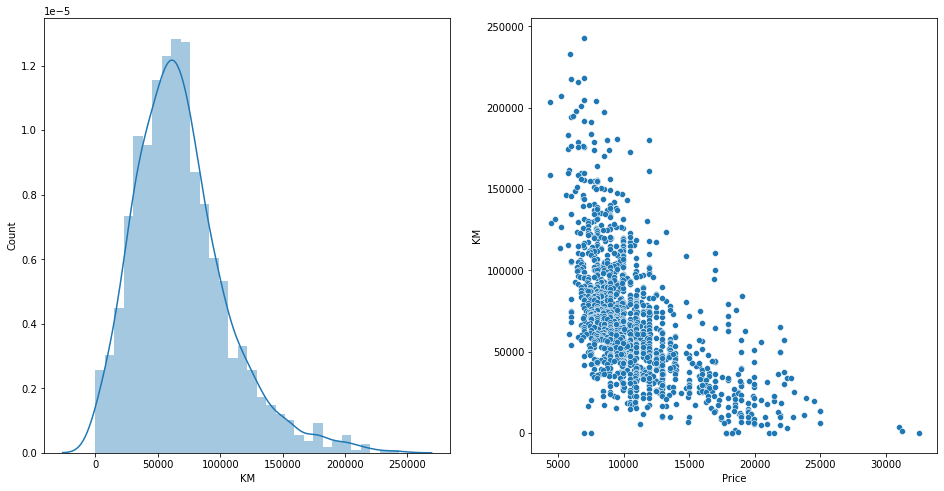

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16,8))

sns.distplot(cars['KM'], ax = axs[0])
axs[0].set_xlabel('KM')
axs[0].set_ylabel('Count')

sns.scatterplot(x = 'Price', y = 'KM', data = cars, ax = axs[1])
axs[1].set_xlabel('Price')
axs[1].set_ylabel('KM')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


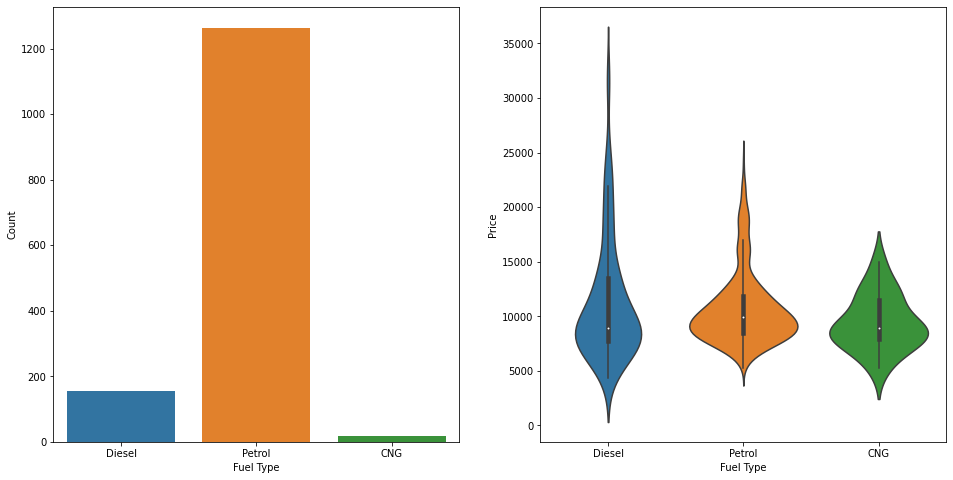

In [ ]:
fuel_list= Counter(cars['FuelType'])
labels = fuel_list.keys()
sizes = fuel_list.values()

f, axs = plt.subplots(1,2,figsize=(16,8))

sns.countplot(cars['FuelType'], ax = axs[0])
axs[0].set_xlabel('Fuel Type')
axs[0].set_ylabel('Count')

sns.violinplot(x = 'FuelType', y = 'Price', data = cars, ax = axs[1])
axs[1].set_xlabel('Fuel Type')
axs[1].set_ylabel('Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


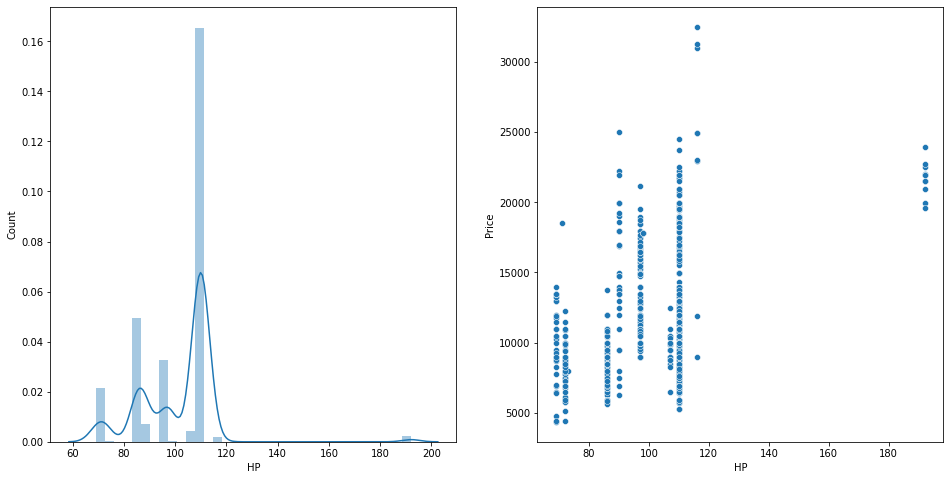

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16,8))

sns.distplot(cars['HP'], ax = axs[0])
axs[0].set_xlabel('HP')
axs[0].set_ylabel('Count')

sns.scatterplot(x = 'HP', y = 'Price', data = cars, ax = axs[1])
axs[1].set_xlabel('HP')
axs[1].set_ylabel('Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


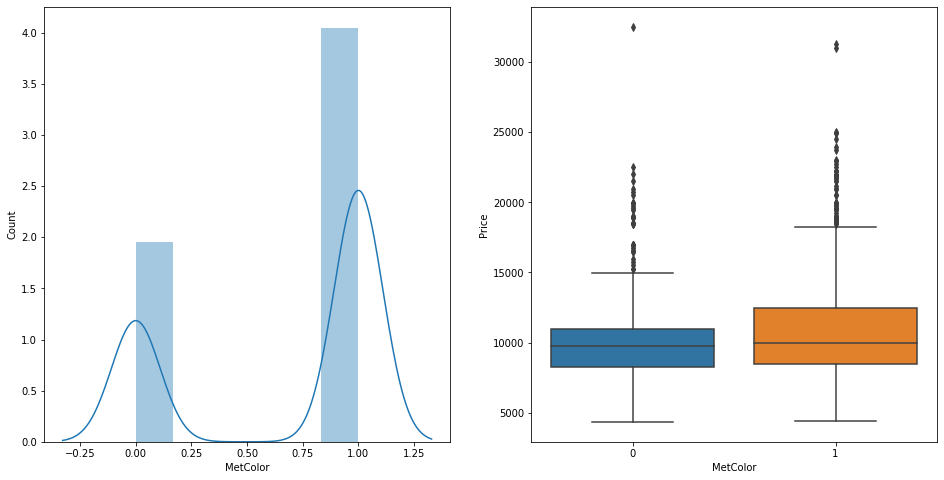

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16,8))

sns.distplot(cars['MetColor'], ax = axs[0])
axs[0].set_xlabel('MetColor')
axs[0].set_ylabel('Count')

sns.boxplot(x = 'MetColor', y = 'Price', data = cars, ax = axs[1])
axs[1].set_xlabel('MetColor')
axs[1].set_ylabel('Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


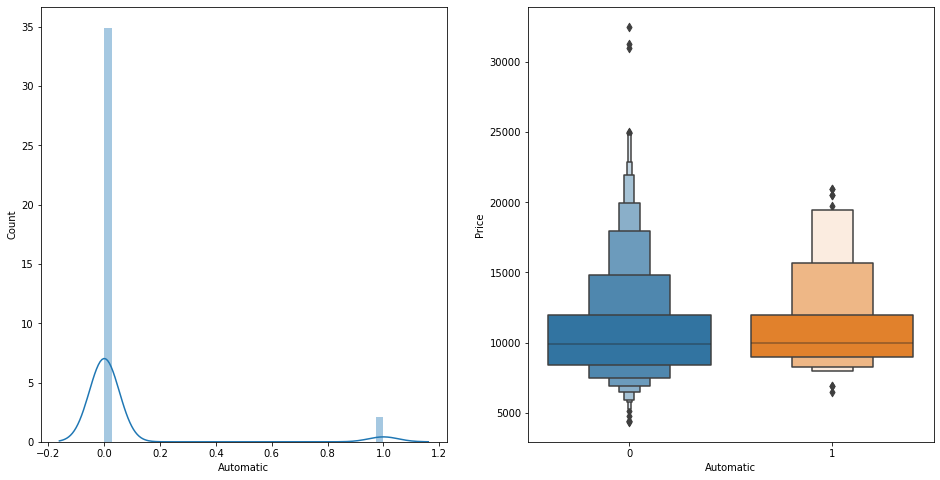

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16,8))

sns.distplot(cars['Automatic'], ax = axs[0])
axs[0].set_xlabel('Automatic')
axs[0].set_ylabel('Count')

sns.boxenplot(x = 'Automatic', y = 'Price', data = cars, ax = axs[1])
axs[1].set_xlabel('Automatic')
axs[1].set_ylabel('Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


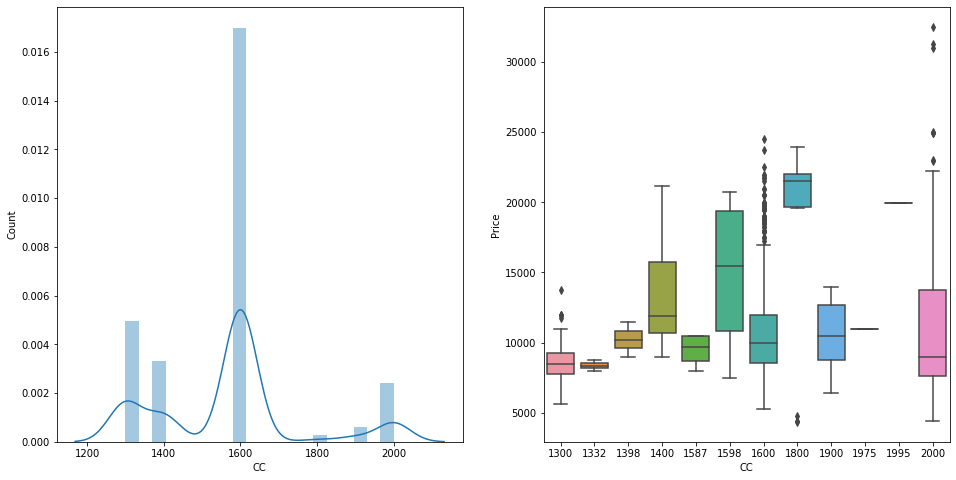

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16,8))

sns.distplot(cars['CC'], ax = axs[0])
axs[0].set_xlabel('CC')
axs[0].set_ylabel('Count')

sns.boxplot(x = 'CC', y = 'Price', data = cars, ax = axs[1])
axs[1].set_xlabel('CC')
axs[1].set_ylabel('Price')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


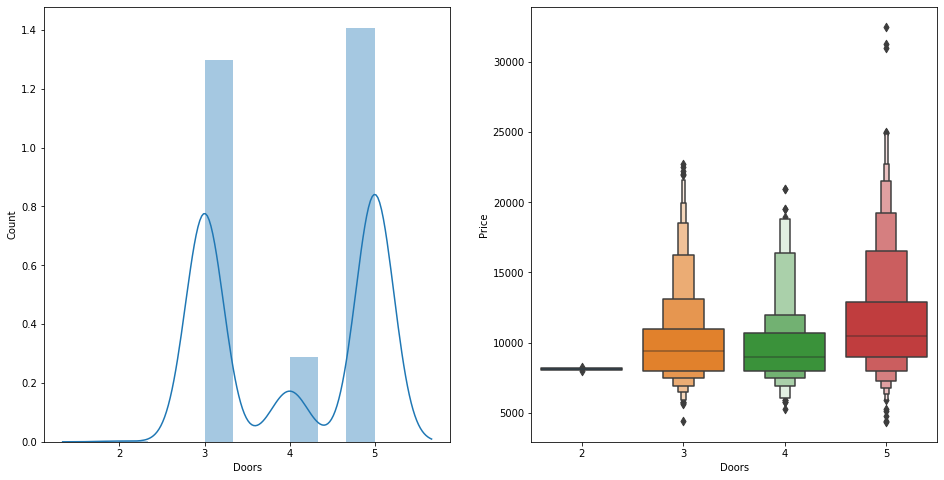

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16,8))

sns.distplot(cars['Doors'], ax = axs[0])
axs[0].set_xlabel('Doors')
axs[0].set_ylabel('Count')

sns.boxenplot(x='Doors', y='Price', data=cars, ax=axs[1])
axs[1].set_xlabel('Doors')
axs[1].set_ylabel('Price')

plt.show()

-----------------------------------------------------------------------

### TRAIN TEST SPLIT

In [ ]:
cars = pd.get_dummies(cars)

x = cars.drop('Price', axis = 1).values
y = cars.iloc[:, 0].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1005, 11)
Shape of X_test:  (431, 11)
Shape of y_train:  (1005, 1)
Shape of y_test (431, 1)


-----------------------------------------------------------------------

### REGRESSION MODEL

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2 = r2_score(y_test, pred)
acc = model.score(x_test,y_test)
print("Model Accuracy: ",acc*100)

Model Accuracy:  85.15288140689907


-----------------------------------------------------------------------

### MODEL EVALUATION

In [ ]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r2_square = metrics.r2_score(y_test, pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square:', r2_square)

MAE: 937.0773400572896
MSE: 1769618.117931481
RMSE: 1330.2699417529816
R2 Square: 0.8515288140689907


In [ ]:
x_test = pd.DataFrame(x_test)
x_test = x_test[1]
#x_test

x_train = pd.DataFrame(x_train)
x_train = x_train[1]
#x_train

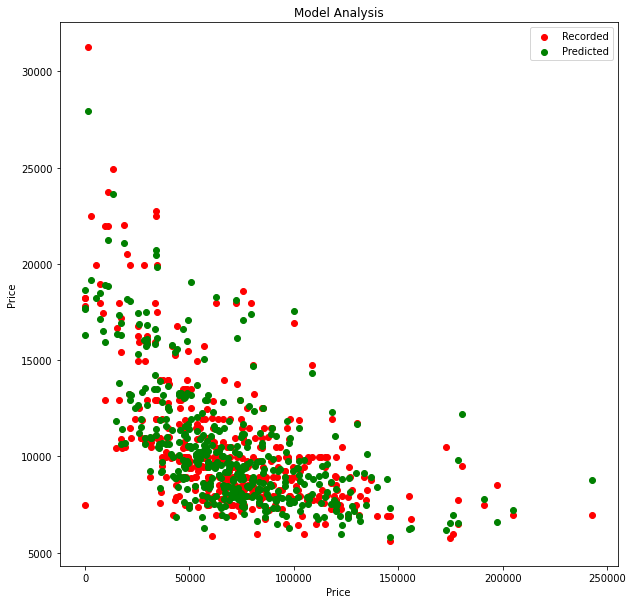

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x_test, y_test, color = "red")
plt.scatter(x_test, pred, color = "green")
plt.title("Model Analysis")
plt.xlabel("Price")
plt.ylabel("Price")
plt.legend(["Recorded", "Predicted"], loc ="upper right")
plt.show()

-----------------------------------------------------------------------

### SUMMARY
* Dataset appears to be clean
* It is seen that the Price of a Car is inversly propotional to it's age
* However the relation between Price and  KM of a car is more complex.
* The colour and CC of the Car appear to be acting as outliers in the dataset and hence are removed during Model Building.
* Our Model Achieved 85% Accuracy in predicting the Price of a Car.

-----------------------------------------------------------------------